In [68]:
import matplotlib.pyplot as plt
from math import sin, cos, exp
import numpy as np

# Métodos para Encontrar Raízes

> f(x) = 4sin(x) - e<sup>x</sup>

> f'(x) = 4cos(x) - e<sup>x</sup>

In [69]:
def f(x):
    return 4 * sin(x) - exp(x)
def der_f(x):
    return 4 * cos(x) - exp(x)

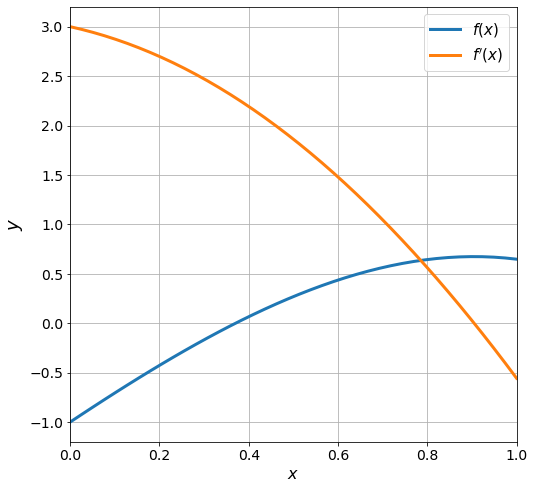

In [74]:
# Realizando plot 
# Convertendo respostas para numpy
x_num, y_num = 1, 1
#beta_num = np.array(solution).astype(float).flatten()

# Gerando a malha (grid)
x_min, x_max = 0, 1
x_grid = np.linspace(x_min, x_max, 40)

# Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
f_grid, d_grid = [], []
for x in x_grid:
    f_grid.append(4 * sin(x) - exp(x))
    d_grid.append(4 * cos(x) - exp(x))
    
# Instruções do plot
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(x_grid, f_grid, linewidth = 3) # reta
ax.plot(x_grid, d_grid, linewidth = 3) # reta
ax.plot(x_num, y_num, linestyle = "None") # pontos do conjunto de dados

# Labels nos eixos, limites do plot e legenda
ax.set_xlabel("$x$", size = 16)
ax.set_ylabel("$y$", size = 18)
ax.set_xlim(x_min, x_max)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(["$f(x)$", "$f'(x)$"], loc = "upper right", fontsize = 15)
ax.grid(True)

plt.show()

### Bissecção

In [58]:
def bissecção(a, b, ξ=1e-5, iteracoes=0):
    x = (a + b) / 2
    y = f(x)
    iteracoes += 1
    if abs(y) < ξ:
        return x, y, iteracoes
    if f(a) * y > 0:
        return bissecção(x, b, iteracoes=iteracoes)
    else:
        return bissecção(a, x, iteracoes=iteracoes)
        

In [62]:
x, y, iteracoes = bissecção(0, 1)
print("iterações: {0}\nx: {1}\ny: {2}".format(iteracoes, x, y))

iterações: 16
x: 0.3705596923828125
y: 3.639752024442444e-06


### Método da Falsa Posição

In [64]:
def falsa_posição(a, b, ξ=1e-5, iteracoes=0):
    f_a, f_b = f(a), f(b)
    x = (a * f_b - b * f_a) / (f_b - f_a)
    y = f(x)
    iteracoes += 1
    if abs(y) < ξ:
        return x, y, iteracoes
    if f_a * y > 0:
        return falsa_posição(x, b, iteracoes=iteracoes)
    else:
        return falsa_posição(a, x, iteracoes=iteracoes)

In [65]:
x, y, iteracoes = falsa_posição(0, 1)
print("iteracoes: {0}\nx: {1}\ny: {2}".format(iteracoes, x, y))

iteracoes: 8
x: 0.37055882835462395
y: 1.669806334314572e-06


### Método de Newton Rápido

In [85]:
def MNR(x0, ξ=1e-5, iteracoes=0, parada=1e3):
    x1 = x0 - f(x0) /der_f(x0)
    y = f(x1)
    iteracoes += 1
    if abs(y) < ξ:
        return x1, y, iteracoes
    elif iteracoes < parada:
        return MNR(x1, iteracoes=iteracoes)
    else:
        return None

In [86]:
x, y, iteracoes = MNR(0.5)
print("iteracoes: {0}\nx: {1}\ny: {2}".format(iteracoes, x, y))

iteracoes: 3
x: 0.37055808376128907
y: -2.7834957228023427e-08


### Método da Secante

In [87]:
def metodo_secante(x0, x1, ξ=1e-5, iteracoes=0, parada=1e3):
    x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
    y = f(x2)
    iteracoes += 1
    if abs(y) < ξ:
        return x2, y, iteracoes
    elif iteracoes < parada:
        return metodo_secante(x1, x2, iteracoes=iteracoes)
    else:
        return None

In [88]:
x, y, iteracoes = metodo_secante(0.5, 1)
print("iteracoes: {0}\nx: {1}\ny: {2}".format(iteracoes, x, y))

iteracoes: 6
x: 0.37055822678379774
y: 2.9825043434961174e-07
